# EDA

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Resizing, Rescaling


import os
from collections import defaultdict

import random

In [2]:
dataset =  tf.data.Dataset.load(r"C:\Users\jorge\DataSets\MalariaDS")

### Data Preprocessing

In order to perform the Exploratory Data Analysis efficiently I will preprocess the dataset and apply some transformations. This transformations will not be definitive for the model deployment phase. 

(The EDA will be performed mainly in the orginal dataset, the transformed dataset will be used in specific parts of the analysis). 

In [3]:
BATCH_SIZE = 32
IM_HEIGHT = 128
IM_WIDTH = 128   
NORMALIZATION = 255.0

In [4]:
resize_rescale_layers = tf.keras.Sequential([
    tf.keras.layers.Resizing(IM_HEIGHT, IM_WIDTH),
    tf.keras.layers.Rescaling(1./NORMALIZATION)
])

@tf.function
def map_fn(images, labels):
    processed_images = resize_rescale_layers(images)
    return processed_images, labels

In [12]:
datasetPrep = dataset.map(map_fn).batch(BATCH_SIZE)

images_Prep = []
labels_Prep = []

for images, labels in datasetPrep:
    images_Prep.extend(images.numpy())
    labels_Prep.extend(labels.numpy())



### Data exploration

In [6]:
class_counts = defaultdict(int)

for data_point in dataset:

    label = data_point[1]
    class_counts[label.numpy()] += 1  

for label, count in class_counts.items():
    print(f"Class {label}: {count} images")

Class 0: 13779 images
Class 1: 13779 images


### Class Comparison

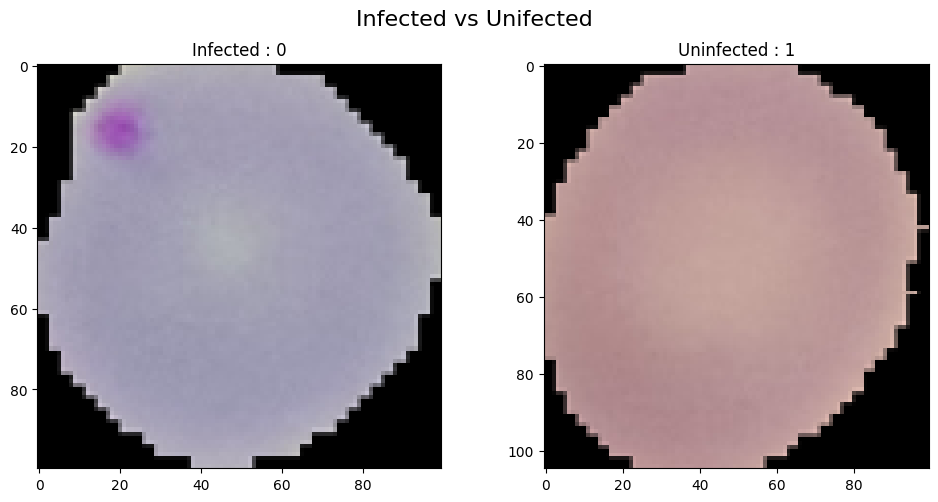

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

plt.suptitle('Infected vs Unifected', fontsize=16)

k = 0
i = 0

target_length = 100

for data_point in dataset:
    image = data_point[0]
    label = data_point[1]

    if label == 0:
        ax = axes[0]
        ax.set_title('{} : {}'.format('Infected' if label == 0 else 'Uninfected', label))

        image_pillow = Image.fromarray(np.uint8(image))
        image_pillow = image_pillow.resize((target_length, int(target_length * image_pillow.height / image_pillow.width)))
        ax.imshow(np.asarray(image_pillow))

        k += 1
        break 

for data_point in dataset:
    image = data_point[0]
    label = data_point[1]

    if label == 1:
        ax = axes[1]
        ax.set_title('{} : {}'.format('Infected' if label == 0 else 'Uninfected', label))

        image_pillow = Image.fromarray(np.uint8(image))
        image_pillow = image_pillow.resize((target_length, int(target_length * image_pillow.height / image_pillow.width)))
        ax.imshow(np.asarray(image_pillow))

        i += 1
        break 

plt.tight_layout()
plt.show()


## Sample Visualization

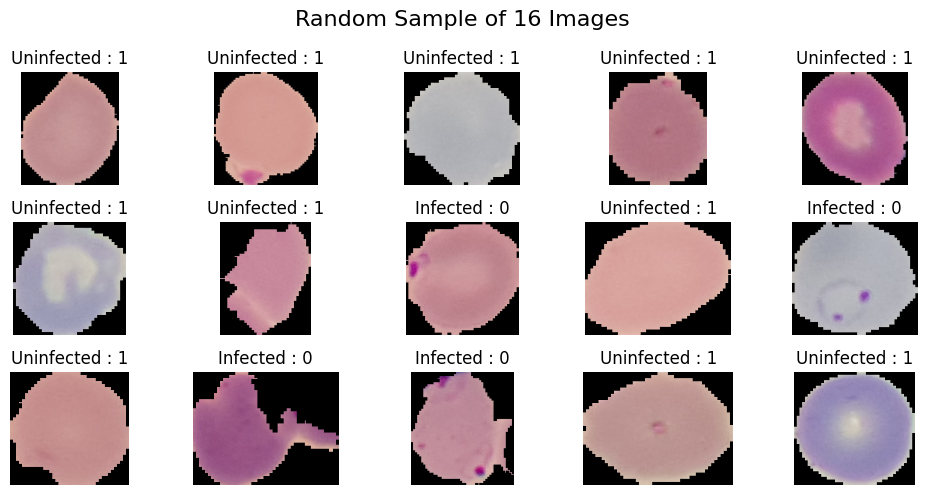

In [8]:
random_sample = random.sample(list(dataset), 15)

fig, axes = plt.subplots(3, 5, figsize=(10,5))

plt.suptitle('Random Sample of 16 Images', fontsize=16)

for i, data_point in enumerate(random_sample):
    image = data_point[0]
    label = data_point[1]
    
    row = i // 5  # Calculate the row index (0-2)
    col = i % 5   # Calculate the column index (0-4))

    ax = axes[row, col]
    ax.set_title('{} : {}'.format('Infected' if label == 0 else 'Uninfected', label))
    ax.axis('off')
    ax.imshow(image)  

plt.tight_layout()
plt.show()

### Image size and Number of channels

In [9]:
image_sizes = defaultdict(int)

for sample in dataset:
    image = sample[0] 
    width, height, _ = image.shape
    image_sizes[(width, height)] += 1

# Sort the image sizes by count in descending order
sorted_sizes = sorted(image_sizes.items(), key=lambda x: x[1], reverse=True)

print("Top 5 image sizes:")
for size, count in sorted_sizes[:5]:
    print(f"Image size: {size[0]} x {size[1]} pixels, Count: {count} images")

print(f"\nThere is a total of {len(sorted_sizes)} different image sizes in the dataset")

Top 5 image sizes:
Image size: 130 x 130 pixels, Count: 224 images
Image size: 124 x 127 pixels, Count: 200 images
Image size: 130 x 127 pixels, Count: 199 images
Image size: 124 x 124 pixels, Count: 191 images
Image size: 127 x 124 pixels, Count: 187 images

There is a total of 1627 different image sizes in the dataset


### Channel configuration

In [10]:
image_sizes = defaultdict(int)

for sample in dataset:
    image = sample[0] 
    num_channels = image.shape[-1]
    image_sizes[num_channels] += 1

if len(image_sizes) == 1 and num_channels == 3:
    print("All images have the RGB channel configuration")
else:
    for channels, count in image_sizes.items():
        print(f"Channel Configuration: {channels} channels, Count: {count} images")

All images have the RGB channel configuration


#### Visualization sample of channel configuration

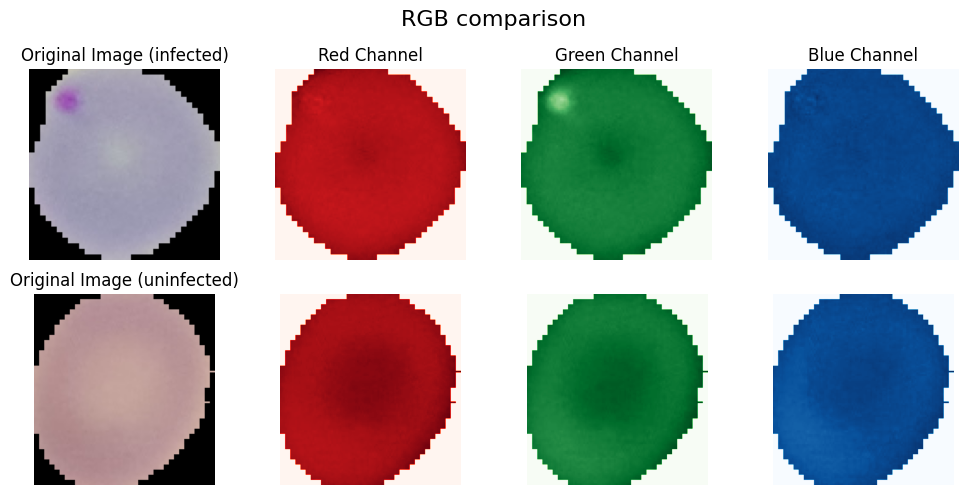

In [71]:
fig, axes = plt.subplots(2, 4, figsize=(10, 5))

plt.suptitle('RGB comparison', fontsize=16)

k = 0
i = 0

for data_point in dataset:
    
    image = data_point[0]
    label = data_point[1]

    if label == 0:
        red_channel = image[:, :, 0]
        green_channel = image[:, :, 1]
        blue_channel = image[:, :, 2]

        axes[0, 0].imshow(image)
        axes[0, 0].set_title('Original Image (infected)')
        axes[0, 0].axis('off')

        axes[0, 1].imshow(red_channel, cmap='Reds')
        axes[0, 1].set_title('Red Channel')
        axes[0, 1].axis('off')

        axes[0, 2].imshow(green_channel, cmap='Greens')
        axes[0, 2].set_title('Green Channel')
        axes[0, 2].axis('off')

        axes[0, 3].imshow(blue_channel, cmap='Blues')
        axes[0, 3].set_title('Blue Channel')
        axes[0, 3].axis('off')

        k += 1
        break 

for data_point in dataset:
    image = data_point[0]
    label = data_point[1]

    if label == 1:
        red_channel = image[:, :, 0]
        green_channel = image[:, :, 1]
        blue_channel = image[:, :, 2]

        axes[1, 0].imshow(image)
        axes[1, 0].set_title('Original Image (uninfected)')
        axes[1, 0].axis('off')

        axes[1, 1].imshow(red_channel, cmap='Reds')
        axes[1, 1].axis('off')

        axes[1, 2].imshow(green_channel, cmap='Greens')
        axes[1, 2].axis('off')

        axes[1, 3].imshow(blue_channel, cmap='Blues')
        axes[1, 3].axis('off')

        i += 1
        break 

plt.tight_layout()
plt.show()

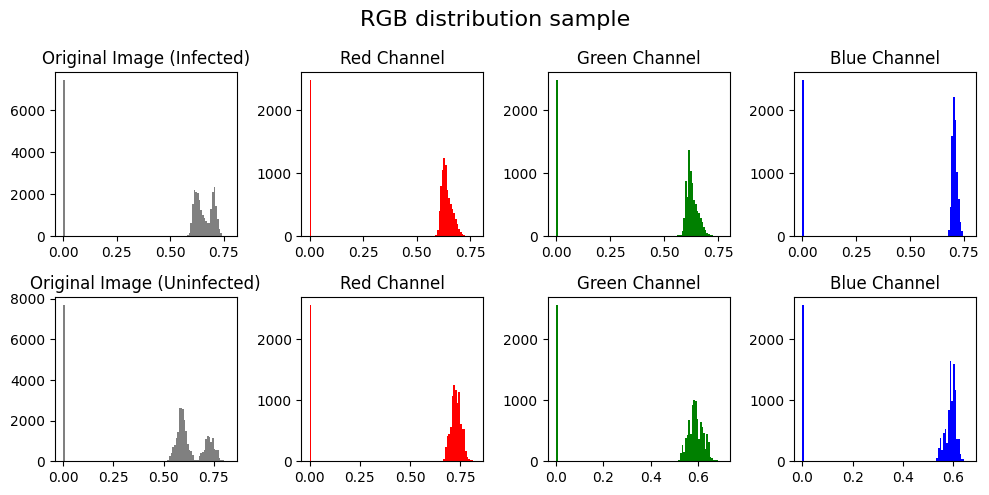

In [19]:
fig, axes = plt.subplots(2, 4, figsize=(10, 5))

plt.suptitle('RGB distribution sample', fontsize=16)

k = 0
i = 0

for data_point in dataset:
    
    image = data_point[0]
    label = data_point[1]

    if label == 0:
        image = tf.cast(image, tf.float32) / 255.0

        red_channel = image[:, :, 0]
        green_channel = image[:, :, 1]
        blue_channel = image[:, :, 2]

        image_values = image.numpy().flatten()
        red_values = red_channel.numpy().flatten()
        green_values = green_channel.numpy().flatten()
        blue_values = blue_channel.numpy().flatten()

        axes[0, 0].hist(image_values, color = "grey", bins = 100)
        axes[0, 0].set_title("Original Image (Infected)")

        axes[0, 1].hist(red_values, color = "red", bins = 100)
        axes[0, 1].set_title("Red Channel")

        axes[0, 2].hist(green_values, color = "green", bins = 100)
        axes[0, 2].set_title("Green Channel")

        axes[0, 3].hist(blue_values, color = "blue", bins = 100)
        axes[0, 3].set_title("Blue Channel")

        k += 1
        break 

for data_point in dataset:
    image = data_point[0]
    label = data_point[1]

    if label == 1:
        image = tf.cast(image, tf.float32) / 255.0

        red_channel = image[:, :, 0]
        green_channel = image[:, :, 1]
        blue_channel = image[:, :, 2]

        image_values = image.numpy().flatten()
        red_values = red_channel.numpy().flatten()
        green_values = green_channel.numpy().flatten()
        blue_values = blue_channel.numpy().flatten()

        axes[1, 0].hist(image_values, color = "grey", bins = 100)
        axes[1, 0].set_title("Original Image (Uninfected)")

        axes[1, 1].hist(red_values, color = "red", bins = 100)
        axes[1, 1].set_title("Red Channel")

        axes[1, 2].hist(green_values, color = "green", bins = 100)
        axes[1, 2].set_title("Green Channel")

        axes[1, 3].hist(blue_values, color = "blue", bins = 100)
        axes[1, 3].set_title("Blue Channel")

        i += 1
        break 

plt.tight_layout()
plt.show()

#### Distribution of each channel in the dataset

In [63]:
datasetPrep


<_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

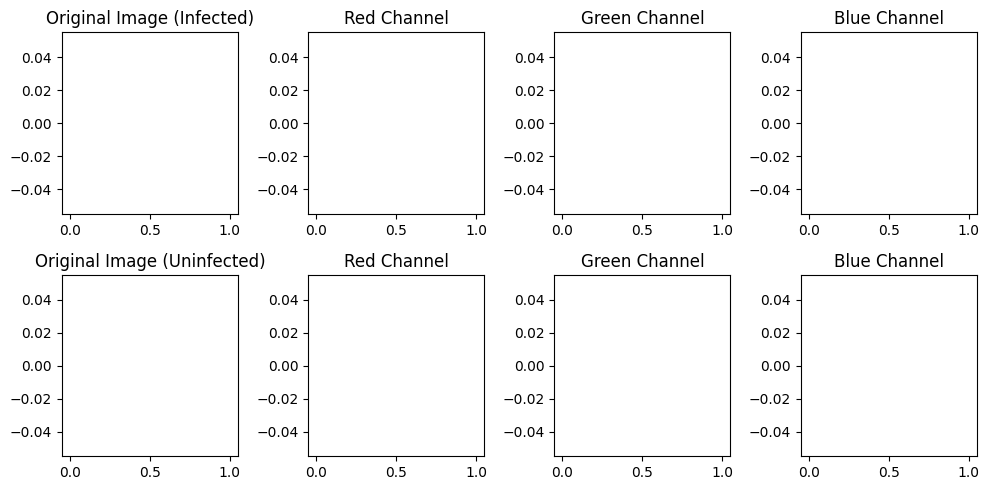

In [67]:
batch_size = 1000          # This process takes a lot of memory, so a batch size of 1000 will be used

class_1_image_values = []
class_1_red_values = []
class_1_green_values = []
class_1_blue_values = []

class_2_image_values = []
class_2_red_values = []
class_2_green_values = []
class_2_blue_values = []

for images, labels in datasetPrep.batch(batch_size, drop_remainder=True):
    # Split the RGB channels
    general_channel = images[:, :, :, :]
    red_channel = images[:, :, :, 0]
    green_channel = images[:, :, :, 1]
    blue_channel = images[:, :, :, 2]

    # Flatten the RGB channels and append to respective class list
    for i in range(tf.size(labels)):
        if labels[i] == 0:
            class_1_image_values.extend(general_channel[i].numpy().flatten())
            class_1_red_values.extend(red_channel[i].numpy().flatten())
            class_1_green_values.extend(green_channel[i].numpy().flatten())
            class_1_blue_values.extend(blue_channel[i].numpy().flatten())
        elif labels[i] == 1:
            class_2_image_values.extend(general_channel[i].numpy().flatten())
            class_2_red_values.extend(red_channel[i].numpy().flatten())
            class_2_green_values.extend(green_channel[i].numpy().flatten())
            class_2_blue_values.extend(blue_channel[i].numpy().flatten())

fig, axes = plt.subplots(2, 4, figsize=(10, 5))

axes[0, 0].hist(class_1_image_values, color = "grey", bins = 200)
axes[0, 0].set_title("Original Image (Infected)")

axes[0, 1].hist(class_1_red_values, color = "red", bins = 200)
axes[0, 1].set_title("Red Channel")

axes[0, 2].hist(class_1_green_values, color = "green", bins = 200)
axes[0, 2].set_title("Green Channel")

axes[0, 3].hist(class_1_blue_values, color = "blue", bins = 200)
axes[0, 3].set_title("Blue Channel")

axes[1, 0].hist(class_2_image_values, color = "grey", bins = 200)
axes[1, 0].set_title("Original Image (Uninfected)")

axes[1, 1].hist(class_2_red_values, color = "red", bins = 200)
axes[1, 1].set_title("Red Channel")

axes[1, 2].hist(class_2_green_values, color = "green", bins = 100)
axes[1, 2].set_title("Green Channel")

axes[1, 3].hist(class_2_blue_values, color = "blue", bins = 100)
axes[1, 3].set_title("Blue Channel")

plt.tight_layout()
plt.show()
            

### Summary statistics

In [70]:
red_values = []
green_values = []
blue_values = []

for images, labels in dataset:
    # Change the range of pixel values from [0, 255] to [0.0, 1.0]
    images = tf.cast(images, tf.float32) / 255.0

    # Split the RGB channels
    red_channel = images[:, :, 0]
    green_channel = images[:, :, 1]
    blue_channel = images[:, :, 2]

    # Flatten the RGB channels and append to list
    red_values.extend(red_channel.numpy().flatten())
    green_values.extend(green_channel.numpy().flatten())
    blue_values.extend(blue_channel.numpy().flatten())

# Convert lists to numpy arrays for calculation
red_values = np.array(red_values)
green_values = np.array(green_values)
blue_values = np.array(blue_values)

# Calculate and print summary statistics for each RGB channel
print("Red Channel: Mean =", np.mean(red_values), "Median =", np.median(red_values), "Std Dev =", np.std(red_values), "Min =", np.min(red_values), "Max =", np.max(red_values))
print("Green Channel: Mean =", np.mean(green_values), "Median =", np.median(green_values), "Std Dev =", np.std(green_values), "Min =", np.min(green_values), "Max =", np.max(green_values))
red_mean, red_median, red_std, red_min, red_max = 0, 0, 0, 0, 0
green_mean, green_median, green_std, green_min, green_max = 0, 0, 0, 0, 0
blue_mean, blue_median, blue_std, blue_min, blue_max = 0, 0, 0, 0, 0

count = 0

for images, labels in dataset:
    # Change the range of pixel values from [0, 255] to [0.0, 1.0]
    images = tf.cast(images, tf.float32) / 255.0

    # Split the RGB channels
    red_channel = images[:, :, 0]
    green_channel = images[:, :, 1]
    blue_channel = images[:, :, 2]

    # Calculate summary statistics for each channel
    red_mean += tf.reduce_mean(red_channel).numpy()
    red_median += tf.math.reduce_median(red_channel).numpy()
    red_std += tf.math.reduce_std(red_channel).numpy()
    red_min += tf.reduce_min(red_channel).numpy()
    red_max += tf.reduce_max(red_channel).numpy()

    green_mean += tf.reduce_mean(green_channel).numpy()
    green_median += tf.math.reduce_median(green_channel).numpy()
    green_std += tf.math.reduce_std(green_channel).numpy()
    green_min += tf.reduce_min(green_channel).numpy()
    green_max += tf.reduce_max(green_channel).numpy()

    blue_mean += tf.reduce_mean(blue_channel).numpy()
    blue_median += tf.math.reduce_median(blue_channel).numpy()
    blue_std += tf.math.reduce_std(blue_channel).numpy()
    blue_min += tf.reduce_min(blue_channel).numpy()
    blue_max += tf.reduce_max(blue_channel).numpy()

    count += 1

# Calculate mean of summary statistics
red_mean /= count
red_median /= count
red_std /= count
red_min /= count
red_max /= count

green_mean /= count
green_median /= count
green_std /= count
green_min /= count
green_max /= count

blue_mean /= count
blue_median /= count
blue_std /= count
blue_min /= count
blue_max /= count

# Print summary statistics for blue channel
print("Blue Channel: Mean =", blue_mean, "Median =", blue_median, "Std Dev =", blue_std, "Min =", blue_min, "Max =", blue_max)


MemoryError: 

In [ ]:
class_1_values = []
class_2_values = []

for images, labels in dataset:
    # Change the range of pixel values from [0, 255] to [0.0, 1.0]
    images = tf.cast(images, tf.float32) / 255.0

    # Flatten the images and append to respective class list
    for i in range(tf.size(labels)):
        if labels[i] == 0:
            class_1_values.extend(images[i].numpy().flatten())
        elif labels[i] == 1:
            class_2_values.extend(images[i].numpy().flatten())

# Convert lists to numpy arrays for calculation
class_1_values = np.array(class_1_values)
class_2_values = np.array(class_2_values)

# Calculate and print summary statistics for each class
print("Class 1: Mean =", np.mean(class_1_values), "Median =", np.median(class_1_values), "Std Dev =", np.std(class_1_values), "Min =", np.min(class_1_values), "Max =", np.max(class_1_values))
print("Class 2: Mean =", np.mean(class_2_values), "Median =", np.median(class_2_values), "Std Dev =", np.std(class_2_values), "Min =", np.min(class_2_values), "Max =", np.max(class_2_values))

### Dimensionality reduction

Is a good practice to check if we can reduce the dimensionality with any method in order to extract the most important features and get rid of certain characteristics which won´t be useful for the data analysis. In this case the image resolution is quite low and the dataset occupies a lot of space because of the amount of image it contains not due to the images size. Therefore it won´t be really useful to perform dimensionality reduction to techniques. Nevertheless a simple analysis will be carried out to understand better the dataset in this sense. 

- In first place a feature which could be removed in most of the photos are the edges since they are black and don´t provide useful information. Nevertheless this might not be suitable. The size of the black edges is not uniform and in order to remove them, other useful features should be removed as well. 

- Other idea which could be applied to the dataset is to make even lower the resolution. This might also not be suitable as the model might perform worst on with lower resolution images, taking into account the actual ones already have a low resolution. 

A simple analysis will be performed to test these hypothesis.

In [82]:
num_dimensions = 32*128*128*3*len(datasetPrep)+(len(datasetPrep)*32)   #Dimensions of the images + dimensions of the labels
print(f"The dataset contains a total of {num_dimensions} dimensions")

The dataset contains a total of 1355836352 dimensions


(-0.5, 127.5, 127.5, -0.5)

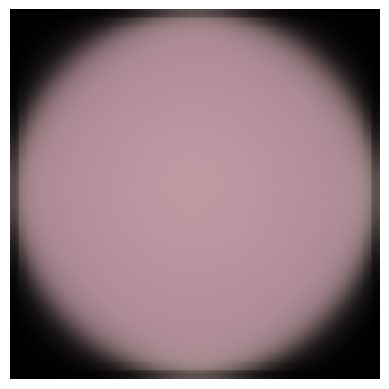

In [9]:
avg_img = np.mean(images_Prep, axis=0)
plt.imshow(avg_img)
plt.axis('off')

## Data augmentation ideas